# Helmholtz Decomposition

## Recollection

$\overrightarrow{\nabla}$ x $(\overrightarrow{\nabla} V) = 0  $ 


$\overrightarrow{\nabla}\cdot(\overrightarrow{\nabla}$ x $\overrightarrow{A})$ $= 0  $   

Note that $V$ is a scalar, and $\overrightarrow{A}$ is a vector

## Conditions for theorem

Any vector that **vanishes** at infinity, can be decomposed into a transverse and longitudinal form.

Longitudinal form in so far as **diverging, non-curling, irrotational** is concerned, while transverse form in so far as **solenoidal, curling, purely rotational, non-diverging** is concerned. 

 A purely “transverse” vector field does not necessarily have all of its vectors perpendicular to
some reference vector. In one sense, the divergence and curl operators can be thought of as orthogonal
operators as their product is zero and they extract independent parts of a general vector field

$$ \overrightarrow{F} = \overrightarrow{\nabla }\phi + \overrightarrow{\nabla} \text{ x } \overrightarrow{\psi} =   \overrightarrow{I} +  \overrightarrow{S} $$

Based off the recalled principles, it is evident how the first term of the simple decomposition shown above is irrotational, while the second term is solenoidal, or to put it simply, the curl of the first term is $\overrightarrow{0}$, and the divergence of the second term is 0. 

$\phi$ could be thought of to be a scalar function quantifying/describing the pressure of the system, and taking the del of it produces a map of how it varies with a chosen coordinate system, while $\overrightarrow{\psi}$ could be thought of as a vector that provides information on the vorticity of cyconlic structures. 

Renaming each of these into $\overrightarrow{I}$ and $\overrightarrow{S}$ is likewise for easier reference in the future of this document, meant to indicate "irrotational", and "solenoidal".

## Sampling some vector fields for decomposition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
from sympy import *
# from sympy.physics.vector import divergence
R = ReferenceFrame('R')

Below is a pre-emptive definition for a 3d vector field quiver plot

In [ ]:
def plot_3d_quiver(x, y, z, u, v, w):
    # COMPUTE LENGTH OF VECTOR -> MAGNITUDE
    c = np.sqrt(np.abs(v)**2 + np.abs(u)**2 + np.abs(w)**2)

    c = (c.ravel() - c.min())/c.ptp()
    # Repeat for each body line and two head lines
    c = np.concatenate((c, np.repeat(c, 2)))
    # Colormap
    c = plt.cm.jet(c)

    fig = plt.figure(dpi = 200)
    ax = fig.gca(projection = '3d')
    ax.quiver(x, y, z, u, v, w, colors = c, length = .2, arrow_length_ratio = .2)
    # plt.gca().invert_zaxis()
    plt.gca()
    plt.show()

### Establishing some common fields

#### Neither divergent nor rotational

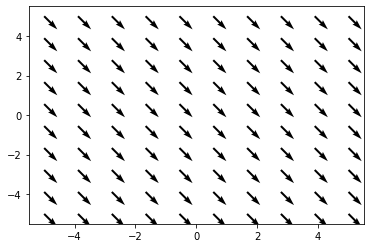

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 1
v = -1

plt.quiver(x,y,u,v)
plt.show()

#### Purely rotational/Solenoidal

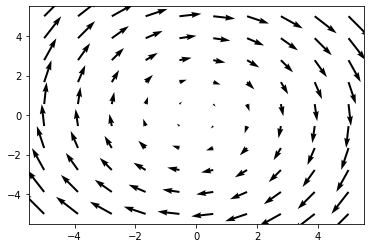

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = y
v = -x

plt.quiver(x,y,u,v)
plt.show()

#### Purely Divergent/Irrotational

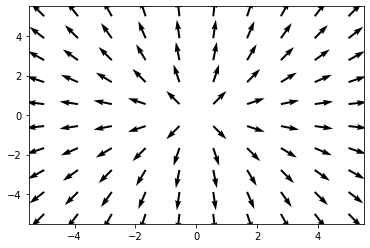

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x/np.sqrt(x**2 + y**2)
v = y/np.sqrt(x**2 + y**2)

plt.quiver(x,y,u,v)

#### Establish some quick check systems 

##### Code to calculate curl

In [ ]:
F = R[1]*R.x - R[0]*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

- 2*R.z

In [ ]:
F = R[0]/(R[0]**2 + R[1]**2)**.5*R.x + R[1]/(R[0]**2 + R[1]**2)**.5*R.y + 0*R.z  #For irrotational field
curl(F,R)

0

##### Code to calculate divergence

For calculating divergence, to avoid conflict with later code, t corresponds to x, s to y, r to z. Apologies for the confusion.

In [ ]:
def divergence(f, x):
    return sum(fi.diff(xi) for fi, xi in zip(f, x))
t, s, r = symbols('t s r')
f = [t/(t**2 + s**2)**.5, s/(t**2 + s**2)**.5] #For irrotational field
divergence(f, [t, s])

-1.0*s**2*(s**2 + t**2)**(-1.5) - 1.0*t**2*(s**2 + t**2)**(-1.5) + 2*(s**2 + t**2)**(-0.5)

In [ ]:
f = [s, -t]   #For solenoidal field
divergence(f, [t, s])

0

### Sample some simple vector fields

Let us consider the field $\overrightarrow{F} = <xy, 0, 0>$

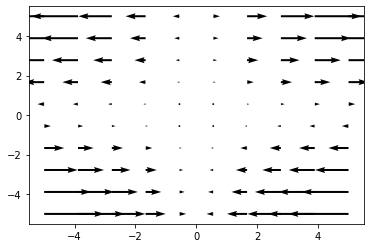

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x*y
v = 0

plt.quiver(x,y,u,v)

Notice that since the z component of this vector field is 0, and in fact, the only non-zero term is independent of z, so this field is valid regardless of what value of z we consider

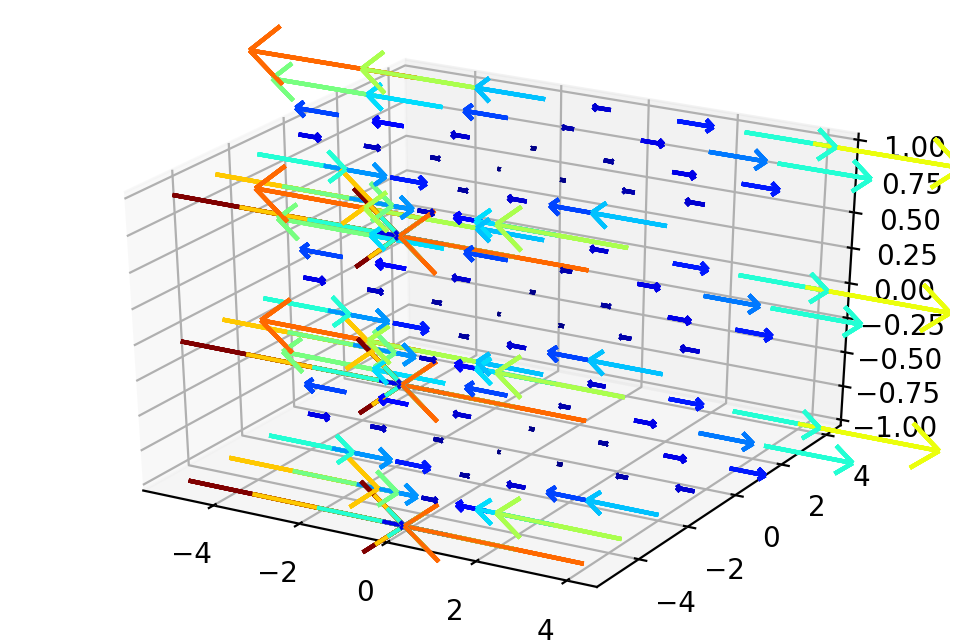

In [ ]:
axis = np.r_[-5:5:1.5]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])

zeros = np.zeros_like(X)
U,V,W = (X*Y, zeros, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

However, despite this field appearing to be so independent of z, if we were to consider the curl and divergence of this field...

In [ ]:

f = [t*s, 0*s, 0*r]
divergence(f, [t, s, r])



s

In [ ]:
F = R[0]*R[1]*R.x + 0*R.y + 0*R.z
curl(F, R)

- R_x*R.z

You will note that the field has a tendency to appearently cause rotation in the negative z direction, or with decreasing depth, or perhaps " increasing altitude", and it increases by quantity x. 

Meanwhile, the divergence of the field is y (note that variables, t,s and r are used to avoid conflict with other uses of variables x and y in plotting axes). So it would appear that this field, is a field that possesses both properties, so understanding how a particle would truly behave in this field may seem difficult, so we shall attempt to decompose it. 

Unfortunately, decomposing it may prove to have possibly complicated understanding this field since we are considering 3d. 

### Steps to decompose a field

1. Consider what the curl of the irrotiational component looks like beforehand. $$ \overrightarrow{\nabla} \text{ x } \overrightarrow{I} = \overrightarrow{0} $$. 

In other words, 
$$ \partial_x I_z = \partial_z I_x  $$
$$ \partial_x I_y = \partial_y I_x  $$
$$ \partial_y I_z = \partial_z I_y  $$

While this relation's relevance may seem far-fetched, it essentially convinces us to consider using simple expressions for the coordinates that do not contribute the divergence of the field that we will consider in the next step, such that they cancel out.


2. Take the divergence of the field. Since the solenoidal term has no divergence, that term is removed, leaving the divergence of the solenoidal term.
$$ \overrightarrow{\nabla}\cdot \overrightarrow{F} = \overrightarrow{\nabla} \cdot \overrightarrow{I}  $$

3. From step 2, reconstructing $\overrightarrow{I}$ while taking note of the relation in step 1 should be simple enough. From there, we reconstruct the solenoidal component by

$$ \overrightarrow{S} =  \overrightarrow{F} - \overrightarrow{I} $$

### Applying the steps

Noting the relation from step 1, applying step 2 shows us that 

$$ \overrightarrow{\nabla}\cdot \overrightarrow{F} = \partial_x xy = y = \partial_x I_x + \partial_y I_y + \partial_z I_z =  \overrightarrow{\nabla}\cdot\overrightarrow{I} $$

Now quickly consider a multivariate vector to be representing I. What is the problem with $\overrightarrow{I} = <0, 0, yz>$ such that the divergence is equal to y?

One of the conditional lines for this vector to have a 0 curl would essentially prevent orthogonal vector quantities to be together in one of the vector elements. In this case, $ \partial_y I_z = z \neq 0 =   \partial_z I_y  $. 

This is why we require an answer that is "linear" in that sense, such that the curl does not come out to be non-zero, such as $<x, \frac{1}{2} y^2, -z>$ (Note: an alternative would be  $<-x, \frac{1}{2} y^2, z>$)

This would finally, allow us to invoke Step 3, whereby we simply subtract the 2 vector fields from one another to get $\overrightarrow{S} = <x(y-1), -\frac{1}{2} y^2, z>$.

However, how do these fields look, and are they actually irrotational and solenoidal respectively?

### Reviewing our answers

#### Verifying the Irrotational component I first

In [ ]:
F = 1*R.x + R[1]**2/2*R.y - 1*R.z
curl(F, R)

0

Curl is indeed zero as expected.

In [ ]:

f = [t, s**2/2, -r]
divergence(f, [t, s, r])

s

Divergence of the irrotational component is indeed non-zero (=y), as we had previously calculated

#### Checking how it looks

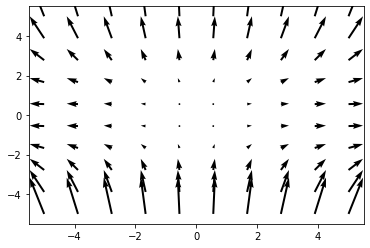

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x
v = y**2/2

plt.quiver(x,y,u,v)

Note that this plot is only a 2dimensional plot that looks at the field at z=0. Interestingly, because of how curl is calculated, the curl of this field is also in fact 0 ! However, its divergence would be y+1, which is because of the loss of the -z component of the field.

In [ ]:
F = 1*R.x + R[1]**2/2*R.y + 0*R.z
curl(F, R)

0

In [ ]:
f = [t, s**2/2]
divergence(f, [t, s])

s + 1

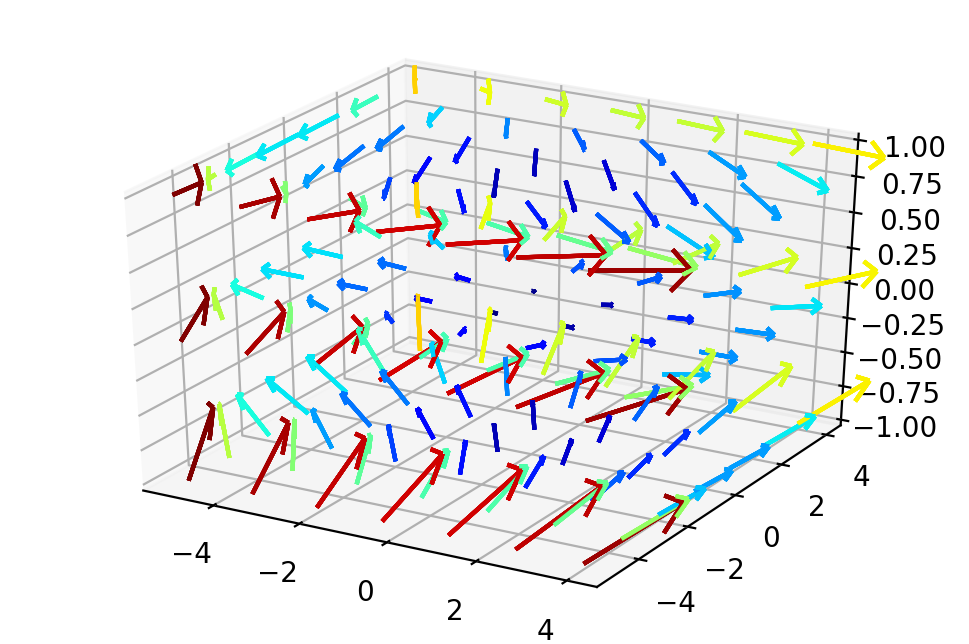

In [ ]:

axis = np.r_[-5:5:1.5]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X, Y**2/2, -Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

While it may be somewhat difficult to note, the middle snadwiched layer is in fact the exact same field as the 2d one that was just plotted! 

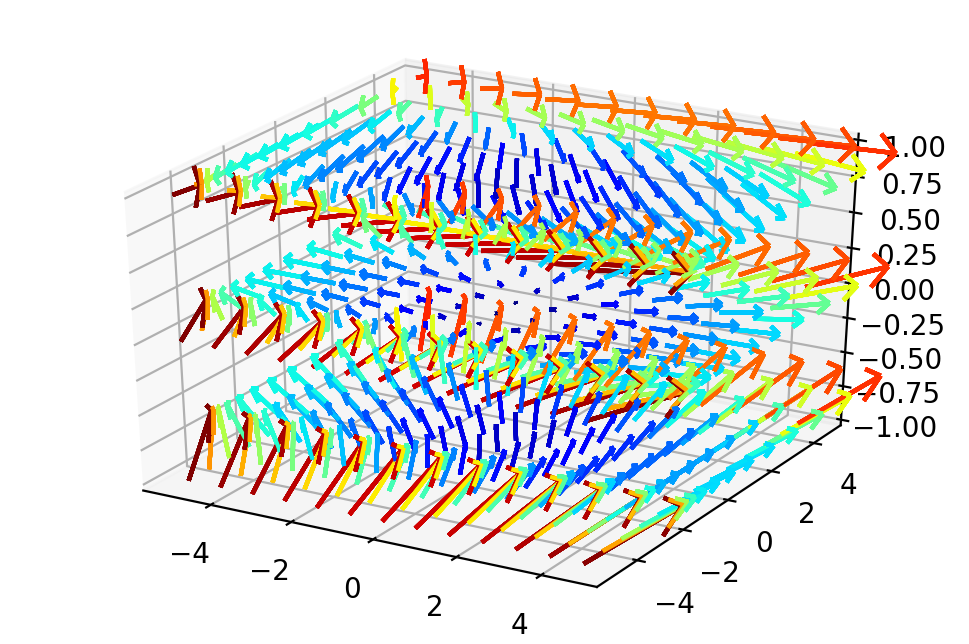

In [ ]:
axis = np.r_[-5:5:.8]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X, Y**2/2, -Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

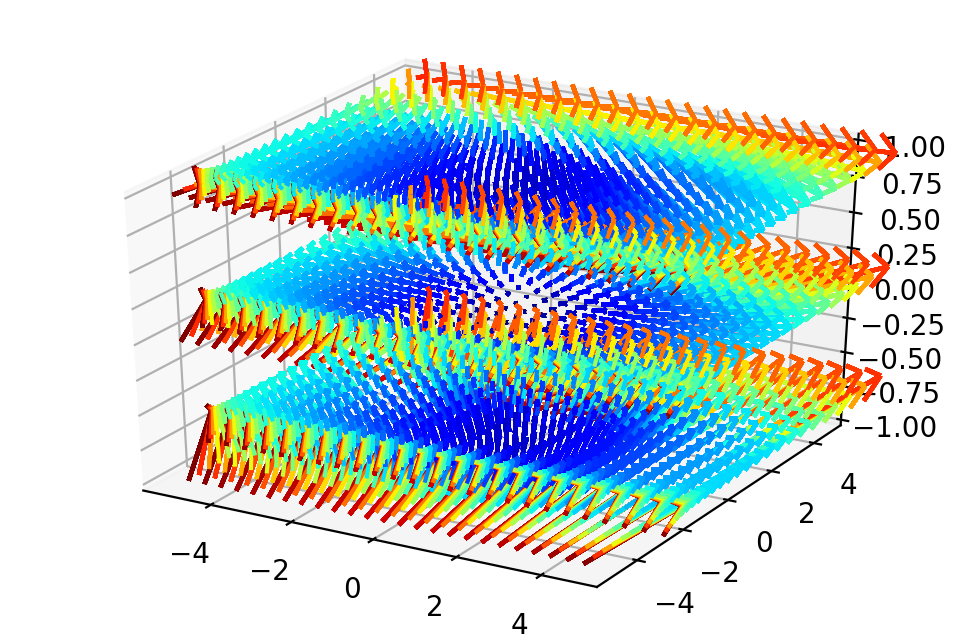

In [ ]:
axis = np.r_[-5:5:.4]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X, Y**2/2, -Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

#### Verifying the Solenoidal component next

$\overrightarrow{S} = <x(y-1), -\frac{1}{2} y^2, z>$

In [ ]:
F = R[0]*(R[1]-1)*R.x - R[1]**2/2*R.y + 1*R.z
curl(F, R)

- R_x*R.z

The curl is verified to be $-x \hat{k}$

In [ ]:
f = [t*(s-1), -s**2/2, r]
divergence(f, [t, s, r])

0

As expected, the solenoidal component appears to have 0 divergence.

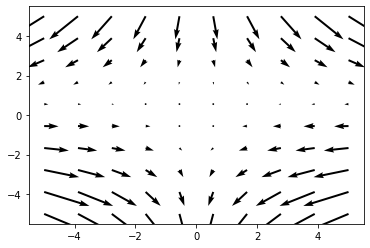

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x*(y-1)
v = -y**2/2

plt.quiver(x,y,u,v)

Note again, that this plot in and of itself, has a divergence of -1, due to the loss of the z dimension. The 3d plot while uncanny, has a proper divergence of 0 as one would hope for a solenoidal component. The 2d plot is plotted purely for illustrative purposes.

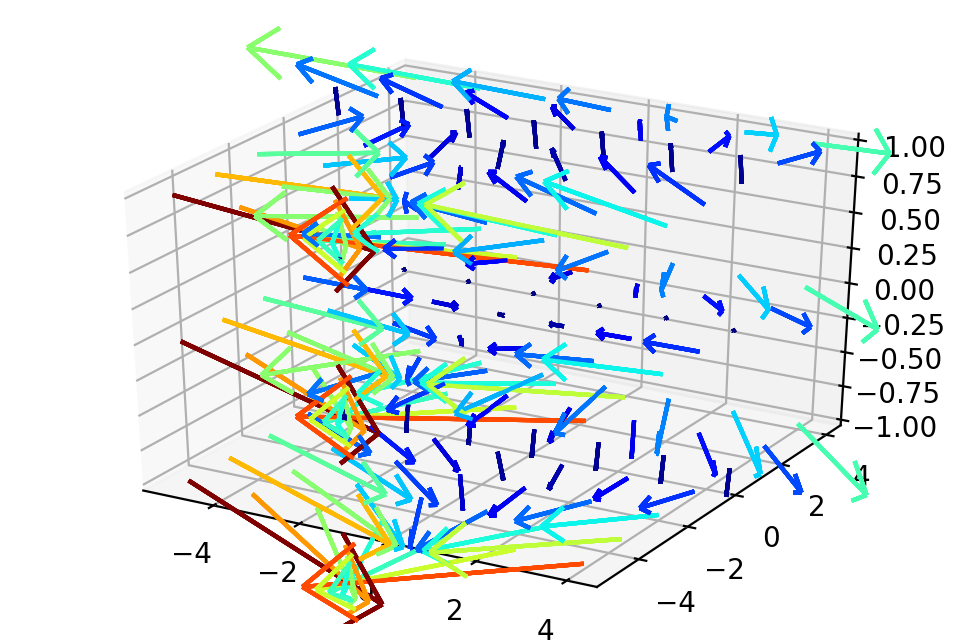

In [ ]:

axis = np.r_[-5:5:1.5]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X*(Y-1), -Y**2/2, Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

While somewhat difficult, the middle horizontal layer is in fact identical to the 2d plot.

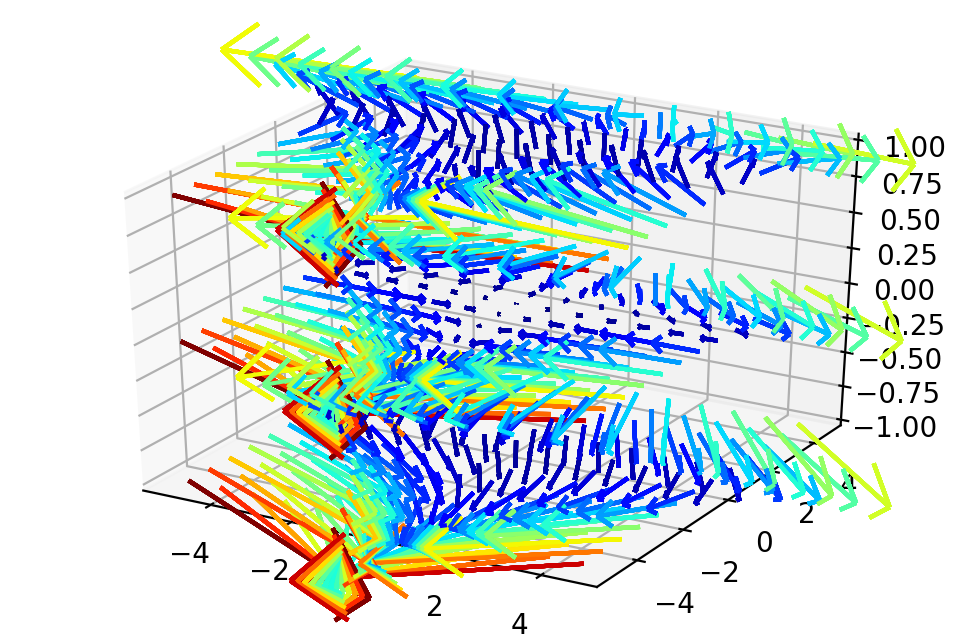

In [ ]:
axis = np.r_[-5:5:.8]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X*(Y-1), -Y**2/2, Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

### Next example

What about $\overrightarrow{F} = <siny, cosx, z>$?

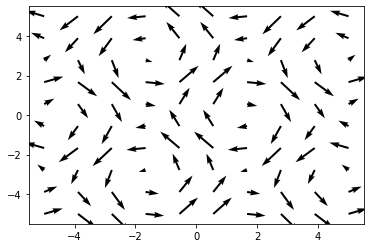

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = np.sin(y)
v = np.cos(x)

plt.quiver(x,y,u,v)

In [ ]:
F = cos(R[1])*R.x + cos(R[0])*R.y + R[2]*R.z   #For the solenoidal vector field 
curl(F,R)

(-sin(R_x) + sin(R_y))*R.z

In [ ]:
f = [sin(s),cos(t), r]
divergence(f, [t, s, r])

1

In [ ]:
def plot_3d_quiver(x, y, z, u, v, w):
    # COMPUTE LENGTH OF VECTOR -> MAGNITUDE
    c = np.sqrt(np.abs(v)**2 + np.abs(u)**2 + np.abs(w)**2)

    c = (c.ravel() - c.min())/c.ptp()
    # Repeat for each body line and two head lines
    c = np.concatenate((c, np.repeat(c, 2)))
    # Colormap
    c = plt.cm.jet(c)

    fig = plt.figure(dpi = 200)
    ax = fig.gca(projection = '3d')
    ax.quiver(x, y, z, u, v, w, colors = c, length = .2, arrow_length_ratio = .7)
    # plt.gca().invert_zaxis()
    plt.gca()
    plt.show()

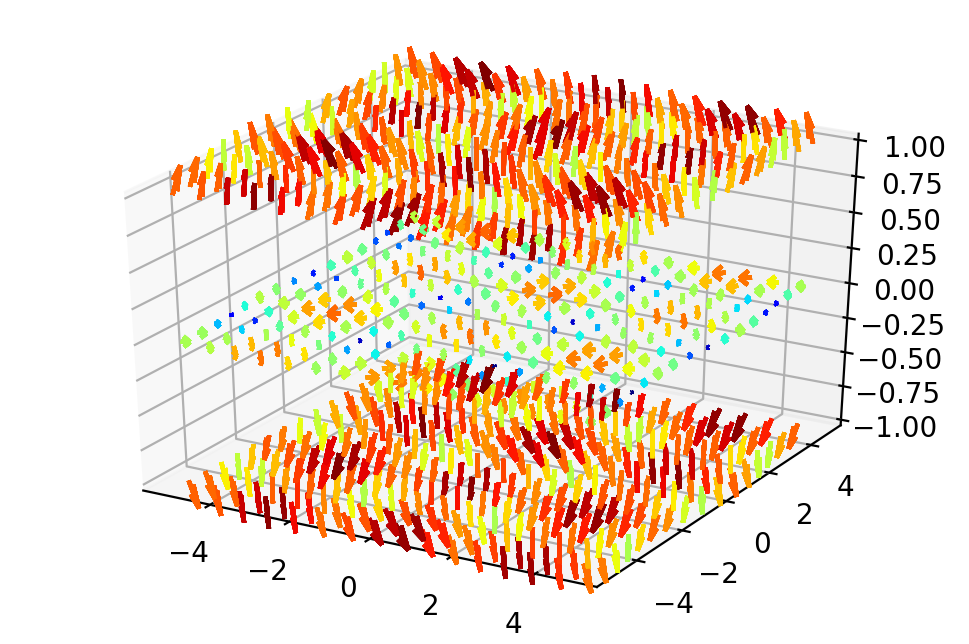

In [ ]:
axis = np.r_[-5:5:.65]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (np.sin(Y),np.cos(X), Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

Consider $\overrightarrow{I} = <0,0, z>$

In [ ]:
F = 0*R.x + 0*R.y + R[2]*R.z   #For the solenoidal vector field 
curl(F,R)

0

In [ ]:
f = [0*t,0*s, r]
divergence(f, [t, s, r])

1

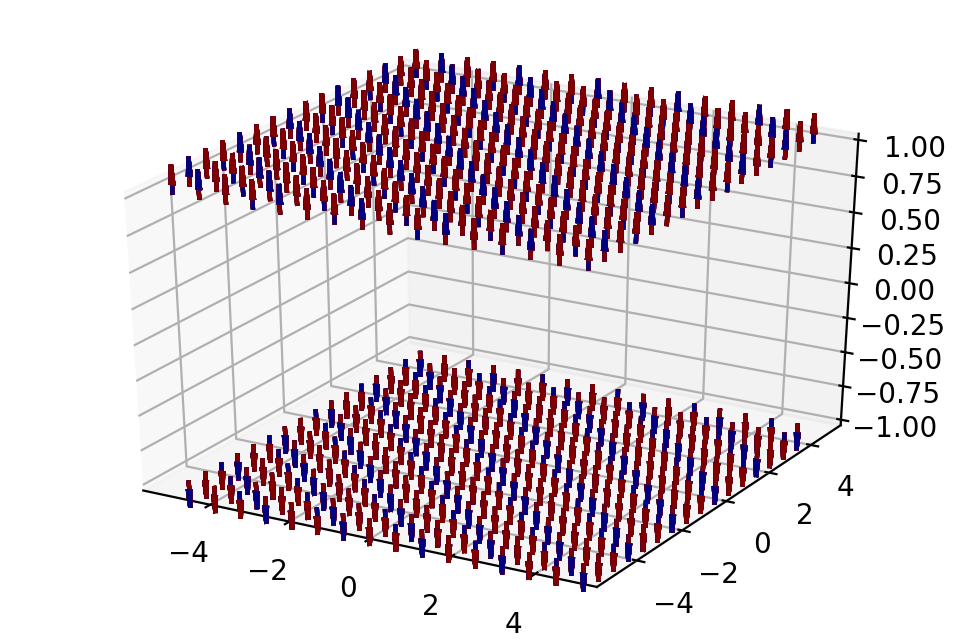

In [ ]:
axis = np.r_[-5:5:.65]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (zeros,zeros, Z[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

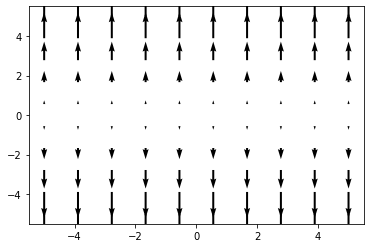

In [ ]:
y,z = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

v = 0
w = z

plt.quiver(y,z,v,w)

So we respectively find that $\overrightarrow{S} = <sin y  , cos x  , 0>$

In [ ]:
F = sin(R[1])*R.x + (cos(R[0]) )*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

(-sin(R_x) - cos(R_y))*R.z

In [ ]:
f = [sin(s),cos(t), 0*r]
divergence(f, [t, s, r])

0

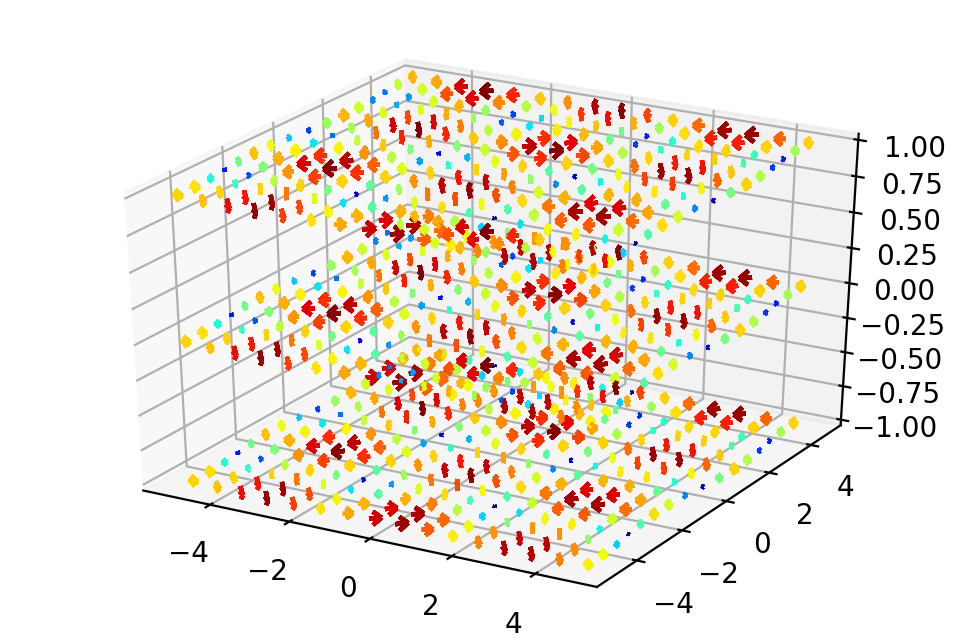

In [ ]:
axis = np.r_[-5:5:.65]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (np.sin(Y),np.cos(X), zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

The above one was very simple, but it somewhat helped illustrate what role trigonometric functions might play in a field's vorticity versus the divergent role of other, simpler expressions


### Another simple field example

Consider $\overrightarrow{F} = <x+2y, x+y, 0>$

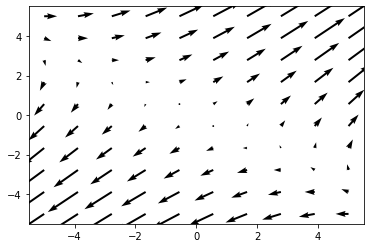

In [ ]:

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x+2*y
v = x+y

plt.quiver(x,y,u,v)

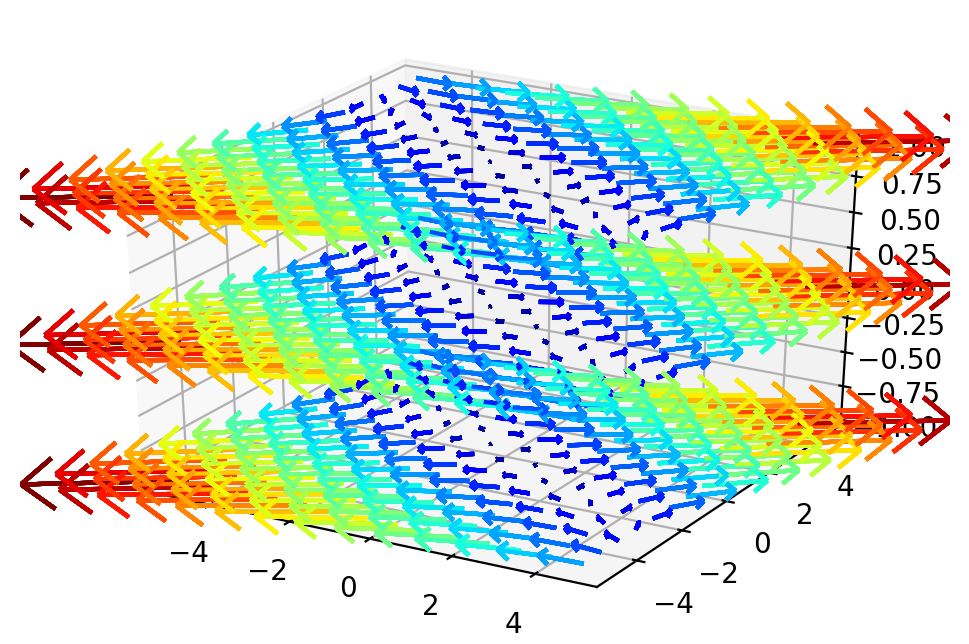

In [ ]:
axis = np.r_[-5:5:.75]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X+2*Y,X+Y, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

In [ ]:
F = (2*R[1]+R[0])*R.x + (R[1]+R[0])*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

- R.z

In [ ]:
f = [t+2*s,t+s, r*0]
divergence(f, [t, s, r])

2

Again, we apply the divergence to the vector field, and wish to construct a second, irrotational vector that produces the same divergence value of 2, without having any curl, and this can be achieved by simply making the vector, "simple" (x expressions in x category, y in y and z in z).

So suppose $\overrightarrow{I} = <0, 2y, 0>$

In [ ]:
F = (0)*R.x + (2*R[1])*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

0

In [ ]:
f = [0*s,2*s, r*0]
divergence(f, [t, s, r]) #Rather obvious result of 2

2

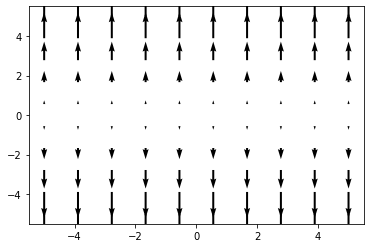

In [ ]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 0
v = 2*y

plt.quiver(x,y,u,v)

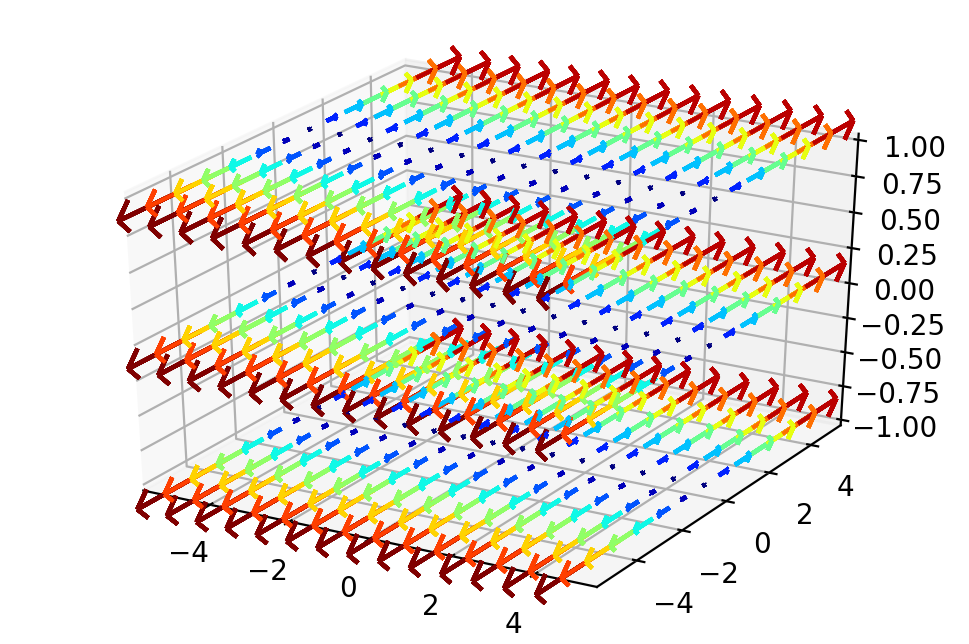

In [ ]:
axis = np.r_[-5:5:.75]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (zeros,2*Y, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

$\therefore \overrightarrow{S} = <x+2y, x-y, 0>$

In [ ]:
F = (R[0]+2*R[1])*R.x + (R[0]-R[1])*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

- R.z

In [ ]:
f = [t+2*s,t-s, r*0]
divergence(f, [t, s, r]) #Rather obvious result of 2

0

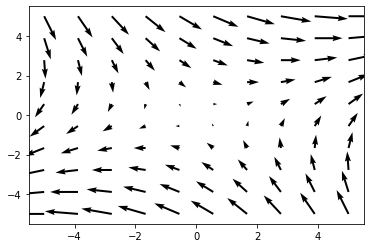

In [ ]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x+2*y
v = x-y

plt.quiver(x,y,u,v)

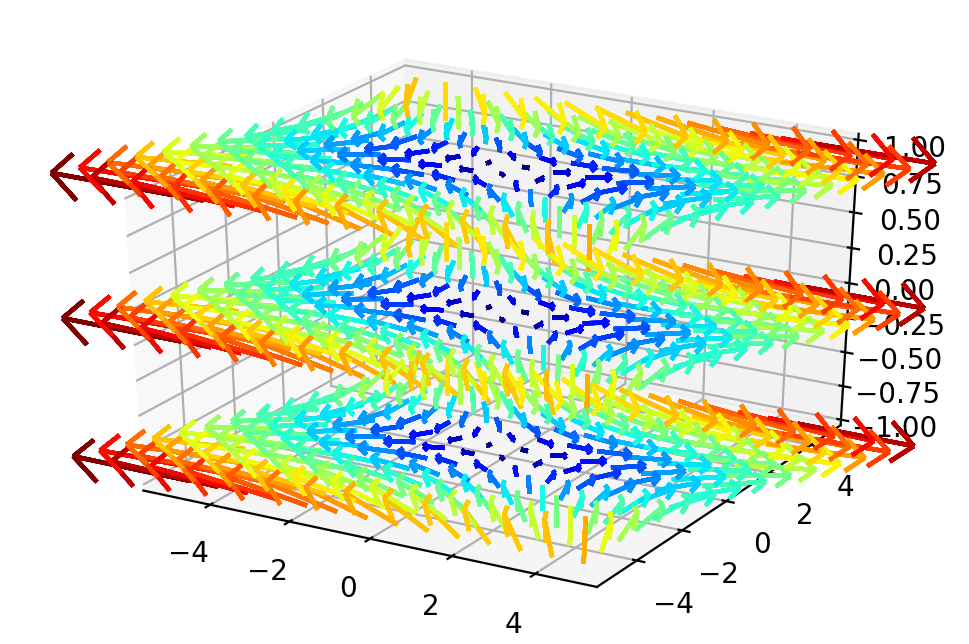

In [ ]:
axis = np.r_[-5:5:.75]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X+2*Y,X-Y, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

The solenoid field component may not intuitively appear to be a purely rotational field, and that is likely because this type of field does not have 0 deformational components.

### Final simple field decomposition example

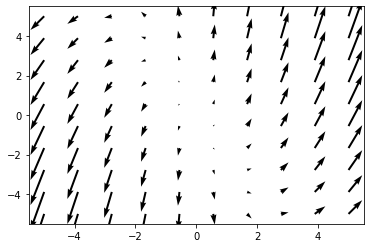

In [ ]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x
v = 2*x+y

plt.quiver(x,y,u,v)

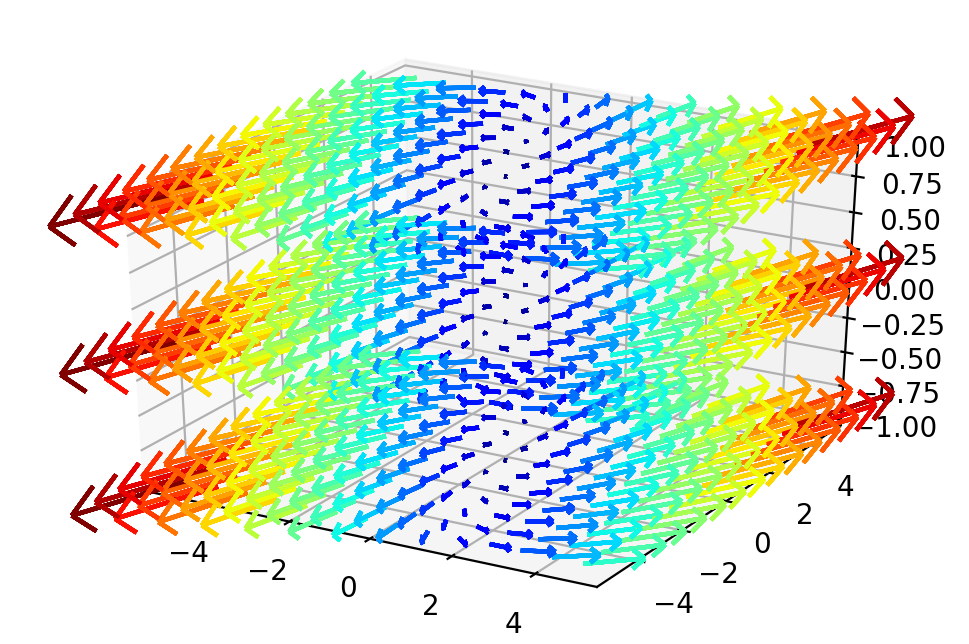

In [41]:
axis = np.r_[-5:5:.75]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X,2*X+Y, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

In [34]:
f = [t,2*t+s, r*0]
divergence(f, [t, s, r]) #Rather obvious result of 2

2

In [ ]:
F = (R[0])*R.x + (2*R[0]+R[1])*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

2*R.z

So, this time round, let us choose $\overrightarrow{I} = <x,y,0>$ with a divergence of 2 and curl of 0

In [36]:
f = [t,s, r*0]
divergence(f, [t, s, r])

2

In [37]:
F = (R[0])*R.x + (R[1])*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

0

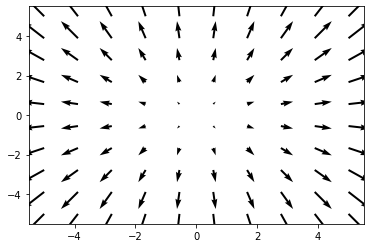

In [42]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x
v = y

plt.quiver(x,y,u,v)

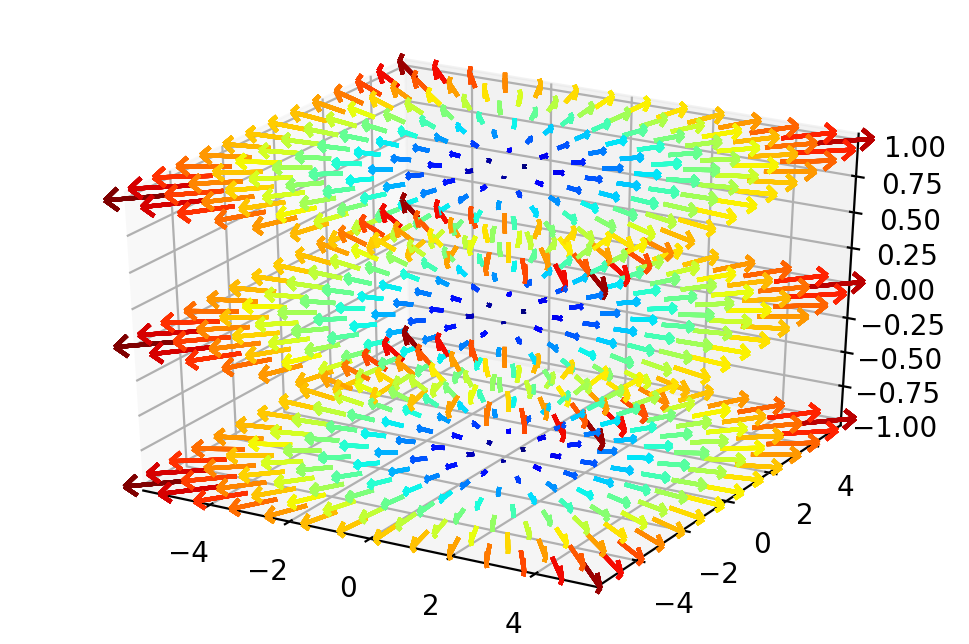

In [43]:
axis = np.r_[-5:5:.75]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (X,Y, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

$\therefore \overrightarrow{S} = <0,2x,0>$, leading to a divergence of 0, and curl of 2 in the z direction.

In [40]:
f = [0*t,2*t, r*0]
divergence(f, [t, s, r])

0

In [39]:

F = (0)*R.x + (2*R[0])*R.y + 0*R.z   #For the solenoidal vector field 
curl(F,R)

2*R.z

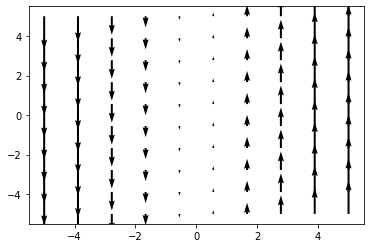

In [44]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 0
v = 2*x

plt.quiver(x,y,u,v)

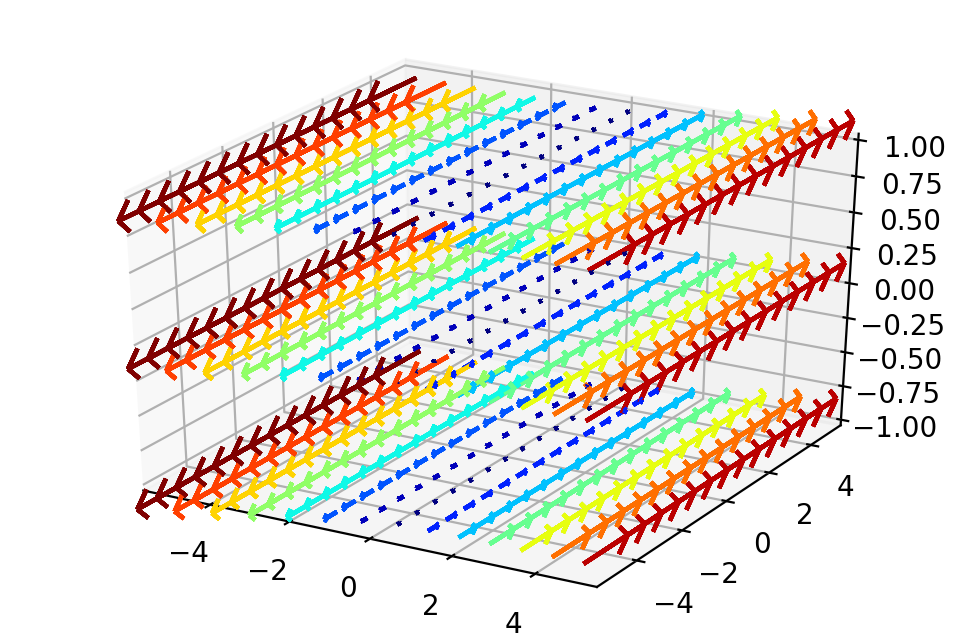

In [46]:
axis = np.r_[-5:5:.75]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (zeros,2*X, zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

### Seemingly unsolvable example due to complexity of vector field [Failed Example]
Let us now consider  $\overrightarrow{F} = <2xyz , - xcos(xy),x^2y>$

It looks too complex to decompose using our method.
Or maybe not?

It is clear that the original vector field is very multivariate in each and every one of the entries, but on quick inspection, it is worth noting that not every single element of the field is actually fully multivariate. Only the first entry uses x,y and z, while the last 2entries are independent of z. 

In fact, we could produce the solenoidal segment of the field instead of the irrotational component, by utilizing the fact that the curl operator effectively reduces multidimensionality of the entries!

#### Addendum to methodology

Consider taking the curl instead of the divergence of the vector field this time, to find the solenoidal component first $$ \overrightarrow{\nabla} \text{ x } \overrightarrow{F} = \overrightarrow{\nabla} \text{ x } \overrightarrow{S}$$

$$
\left(\begin{array}{cc} 
\partial_y(x^2y) - \partial_z(-xcos(xy))\\
\partial_z(2xyz) - \partial_x(x^2y)\\
\partial_x(-xcos(xy)) - \partial_y(2xyz)
\end{array}\right) = 
\left(\begin{array}{cc} 
x^2\\ 
0\\
-cos(xy) +xysin(xy) -  2xz
\end{array}\right) = 
\left(\begin{array}{cc} 
\partial_y(S_z) - \partial_z(S_y)\\
\partial_z(S_x) - \partial_x(S_z)\\
\partial_x(S_y) - \partial_y(S_x)
\end{array}\right)
$$ 

Taking the curl of the vector field produced a simpler quantity than expected.  Let us perhaps take both $\partial_z(S_x)$ and $\partial_x(S_z)$ to be 0. 

In fact, let us consider both quantities, $S_x$ and $S_z$ to be 0. There shouldn't be an issue as long as $\overrightarrow{S}$ has a non-zero curl and zero divergence.

That would mean that

$$\left(\begin{array}{cc} 
x^2\\ 
0\\
-cos(xy) +xysin(xy) -  2xz
\end{array}\right) = 
\left(\begin{array}{cc} 
- \partial_z(S_y)\\
0\\
\partial_x(S_y)
\end{array}\right)
$$ 

The issue would then arise however, that obtaining an expression for $S_y$ such that its derivative with respect to z simply produced $x^2$, while its derivative with respect to x somehow leads to a complicated expression $-cos(xy) +xysin(xy) -2xz$.

However, it looks as if $S_y$ would very easily be the expression $S_y = -x^2z$. Let us revisit our assumptions about $S_x$ in particular.

#### Does $S_x$ have to be 0?

$$ \partial_z S_x = \partial_x S_z = 0 $$

So we simply set $S_x = S_z = 0$ for the above conditions to be met. However, we could also, set $S_x = f(x,y)$ only, and it would still satistfy the condition $\partial_z S_x = 0$. $S_z$ can still remain as 0 since it does not appear to mess with our attempt at decomposition.

In fact, we could set $$ \partial_y S_x = -(-cos(xy) + xysin(xy))$$

$$ \partial_y S_x = cos(xy) - xy sin(xy)$$

The above expression could be integrated directly by observing that it is reminiscent of the product rule if we differentiated $ycos(xy)$ wrt y. If not convincing, we could also choose to brute force with integration by parts as below

$$ S_x = \frac{sinxy}{x} - \int xysinxy \text{ } dy $$

Letting $dv = xsinxy$ $dy$ and $u=y$, we correspondingly note that using $v = -cosxy$ and $du=1$, gives us

$$ \int xysinxy \text{ } dy = -ycosxy - \int -cosxy \text{ } dy = -ycosxy + \frac{sinxy}{x} $$



$$ \therefore S_x = \frac{sinxy}{x} - \int xysinxy \text{ } dy =  \frac{sinxy}{x} - (-ycosxy + \frac{sinxy}{x}) = ycosxy $$



$$ \therefore \overrightarrow{S} = <S_x,S_y, S_z> = <ycosxy, -x^2z, 0>$$

And therefore, 

$$ \overrightarrow{I} = \overrightarrow{F} - \overrightarrow{S} = <2xyz - ycosxy, x^2z - xcosxy, x^2y> $$

In [ ]:
def plot_3d_quiver(x, y, z, u, v, w):
    # COMPUTE LENGTH OF VECTOR -> MAGNITUDE
    c = np.sqrt(np.abs(v)**2 + np.abs(u)**2 + np.abs(w)**2)

    c = (c.ravel() - c.min())/c.ptp()
    # Repeat for each body line and two head lines
    c = np.concatenate((c, np.repeat(c, 2)))
    # Colormap
    c = plt.cm.jet(c)

    fig = plt.figure(dpi = 200)
    ax = fig.gca(projection = '3d')
    ax.quiver(x, y, z, u, v, w, colors = c, length = .25, arrow_length_ratio = .4)
    # plt.gca().invert_zaxis()
    plt.gca()
    plt.show()

$\overrightarrow{F} = <2xyz , - xcos(xy),x^2y>$

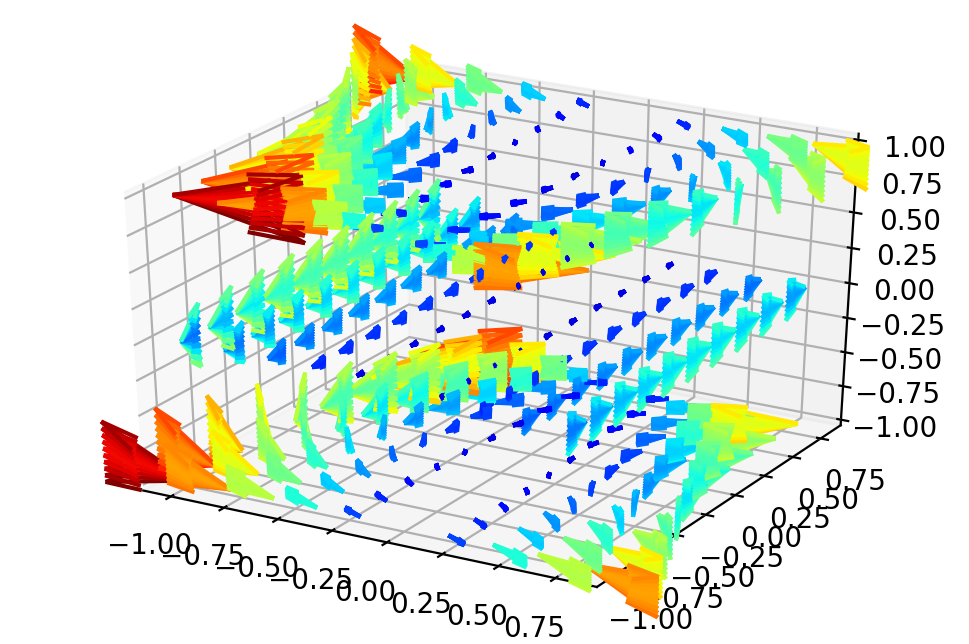

In [ ]:
axis = np.r_[-1:1:.2]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (2*X*Y*Z ,  -  X*np.cos(X*Y), (X**2)*Y[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

$  \overrightarrow{S} = <ycosxy, -x^2z, 0>$

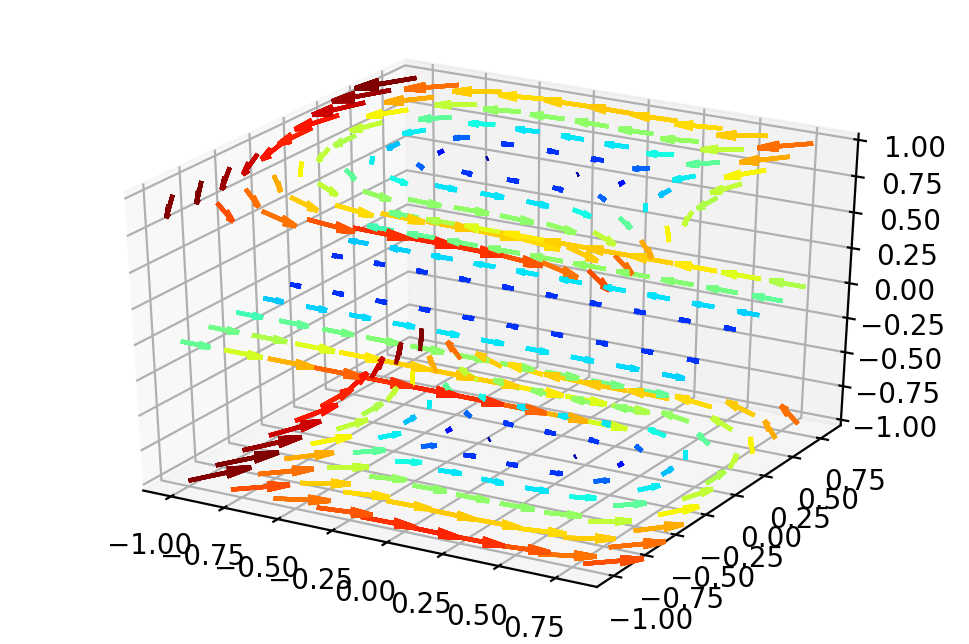

In [ ]:
axis = np.r_[-1:1:.2]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (- Y*np.cos(X*Y), -(X**2)*Z , zeros[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

As it turns out, this field above is meant to represent the solenoidal component, but its divergence is not 0. The decomposition is not possible with this method. However, for what it is worth, below is the irrotational field, which at least does fulfill the requirements for an irrotational field.

$ \overrightarrow{I} = <2xyz - ycosxy, x^2z - xcosxy, x^2y> $

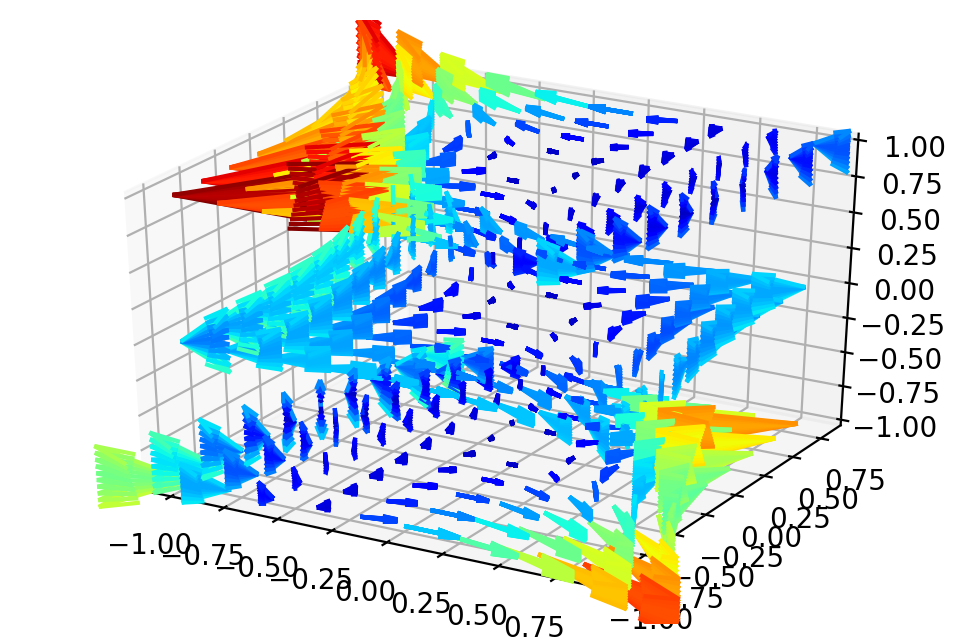

In [ ]:
axis = np.r_[-1:1:.2]
X,Y,Z = np.meshgrid(axis,axis,np.r_[-1:2:1])
zeros = np.zeros_like(X)
# U,V,W = (zeros, zeros, zeros+np.linspace(0,-1,len(axis))[:,np.newaxis,np.newaxis])
U,V,W = (2*X*Y*Z - Y*np.cos(X*Y), (X**2)*Z -  X*np.cos(X*Y), (X**2)*Y[:,np.newaxis,np.newaxis])
plot_3d_quiver(X,Y,Z,U,V,W)

Solenoid revisit

In [ ]:
F = (R[1]*cos(R[0]*R[1]))*R.x + (-R[0]**2*R[2] )*R.y + (-R[2]**2*sin(R[0]*R[1]))*R.z   #For the solenoidal vector field 
curl(F,R)

(R_x**2 + R_x*R_y*R_z*sin(R_x*R_y) - R_z*cos(R_x*R_y))*R.x - R_y**2*R_z*sin(R_x*R_y)*R.y + (R_x*R_y*sin(R_x*R_y) - 2*R_x*R_z - cos(R_x*R_y))*R.z

In [ ]:
f = [ s*cos(t*s),-t**2*r , 0*r]
divergence(f, [t, s, r])

-s**2*sin(s*t)

In [ ]:
f = [ s*cos(t*s),-t**2*r , r*s**2*sin(t*s)]
divergence(f, [t, s, r])

0

Corresponding irr

In [ ]:
F = (2*R[0]*R[1]*R[2]-R[1]*cos(R[0]*R[1]))*R.x + ( R[0]**2*R[2]- R[0]*cos(R[0]*R[1]) )*R.y + (R[0]**2*R[1] - R[2]*R[1]**2*sin(R[0]*R[1]))*R.z   #For the irr vector field 
curl(F,R)

(-R_x*R_y**2*R_z*cos(R_x*R_y) - 2*R_y*R_z*sin(R_x*R_y))*R.x + R_y**3*R_z*cos(R_x*R_y)*R.y

In [ ]:
F = (2*R[0]*R[1]*R[2])*R.x + ( - R[0]*cos(R[0]*R[1]) )*R.y + (R[0]**2*R[1])*R.z   #For the irr vector field 
curl(F,R)

R_x**2*R.x + (R_x*R_y*sin(R_x*R_y) - 2*R_x*R_z - cos(R_x*R_y))*R.z

In [ ]:
F = (0*R[1]*cos(R[0]*R[1]))*R.x + (-R[0]**2*R[2]-cos(R[0]*R[1]) )*R.y + (R[0]*R[2]*sin(R[0]*R[1]))*R.z   #For the new irr vector field 
curl(F,R)

(R_x**2*R_z*cos(R_x*R_y) + R_x**2)*R.x + (-R_x*R_y*R_z*cos(R_x*R_y) - R_z*sin(R_x*R_y))*R.y + (-2*R_x*R_z + R_y*sin(R_x*R_y))*R.z

In [ ]:
F = (2*R[0]*R[1]*R[2]-R[1]*cos(R[0]*R[1]))*R.x + ( R[0]**2*R[2]- R[0]*cos(R[0]*R[1]) )*R.y + (R[0]**2*R[1])*R.z   #For the irr vector field 
curl(F,R)

0

In [ ]:
f = [2*s*t*r - s*cos(t*s),t**2*r - t*cos(t*s) ,t**2*s]
divergence(f, [t, s, r])

2*r*s + s**2*sin(s*t) + t**2*sin(s*t)